In [35]:
import pydotplus 
import pandas as pd

from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
%matplotlib inline

# 2. Применение решающего дерева

In [8]:
data = pd.read_csv("german.data-numeric", header=None, delim_whitespace=True)
data.head()

0   1   2   3   4   5   6   7   8   9  ...  15  16  17  18  19  20  21  22  \
0   1   6   4  12   5   5   3   4   1  67 ...   0   0   1   0   0   1   0   0   
1   2  48   2  60   1   3   2   2   1  22 ...   0   0   1   0   0   1   0   0   
2   4  12   4  21   1   4   3   3   1  49 ...   0   0   1   0   0   1   0   1   
3   1  42   2  79   1   4   3   4   2  45 ...   0   0   0   0   0   0   0   0   
4   1  24   3  49   1   3   3   4   4  53 ...   1   0   1   0   0   0   0   0   

   23  24  
0   1   1  
1   1   2  
2   0   1  
3   1   1  
4   1   2  

[5 rows x 25 columns]

In [25]:
model = tree.DecisionTreeClassifier()
model.fit(data.iloc[:, :-1], data[24])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [32]:
feature_names = ['Status of existing checking account', 'Duration in month',\
                'Credit history', 'Credit amount', 'Purpose', 'Savings account/bonds',\
                'Present employment since', 'Installment rate in percentage of disposable income',\
                'Personal status and sex', 'Other debtors / guarantors', 'Present residence since',\
                'Property', 'Age', 'Other installment plans', 'Housing', 'Number of existing credits at this bank',\
                'Job', 'Number of people being liable to provide maintenance for', 'Telephone', 'foreign worker', '_','__', '___', '____']
target_names=['Good', 'Bad']
dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                         feature_names=feature_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True, max_depth=3)

Маленькое дерево

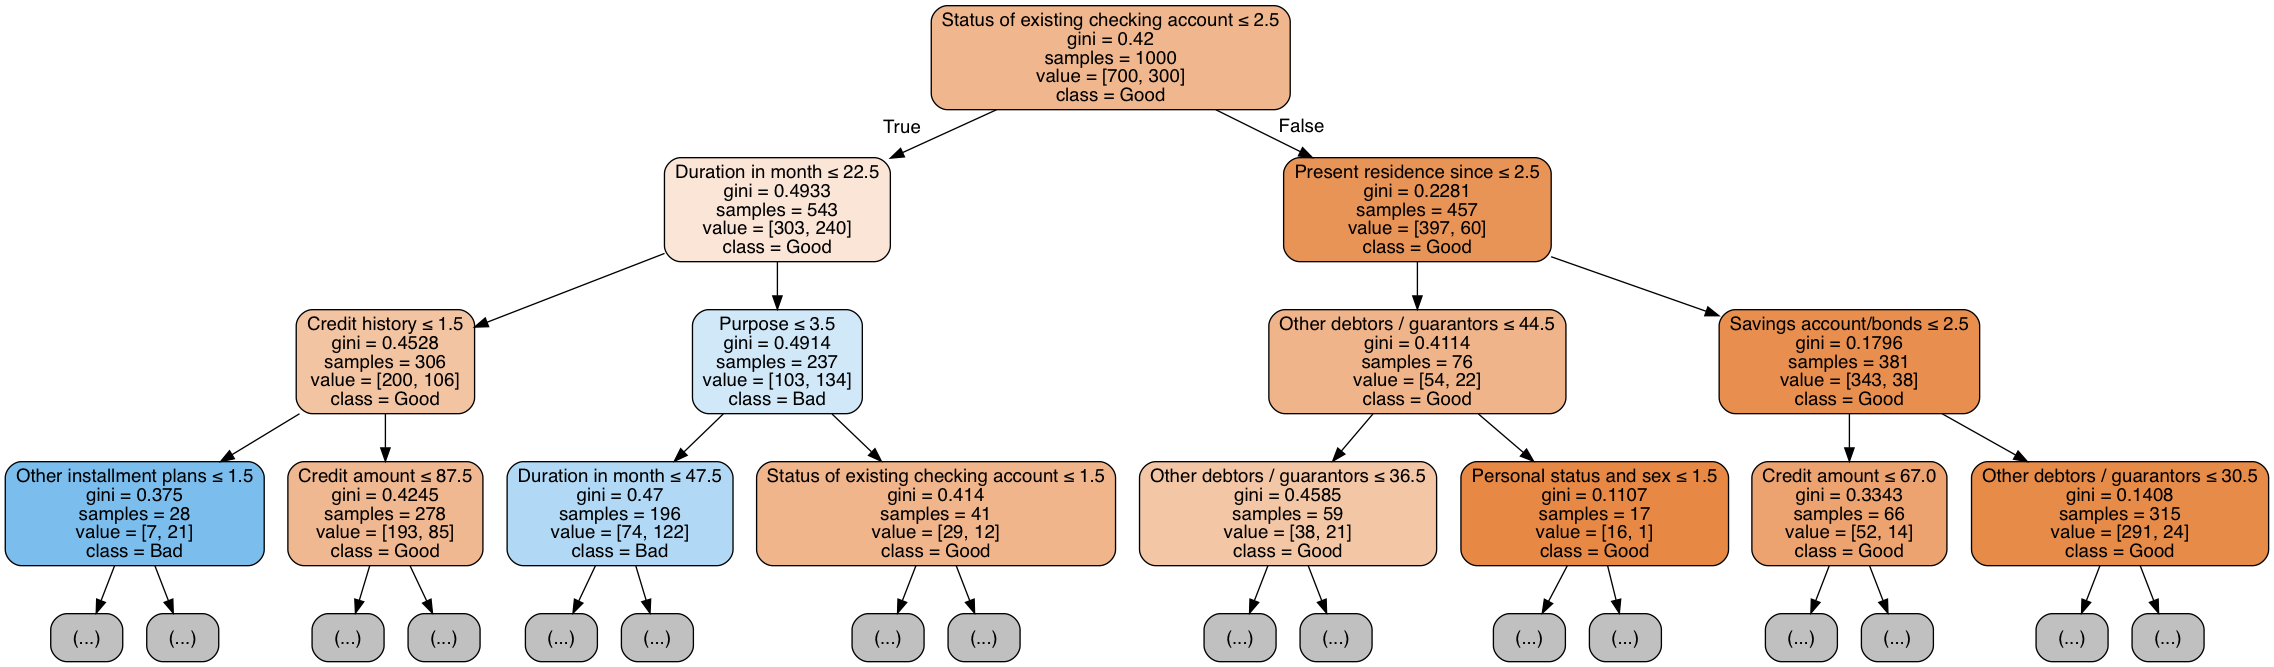

In [33]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())

Большое дерево

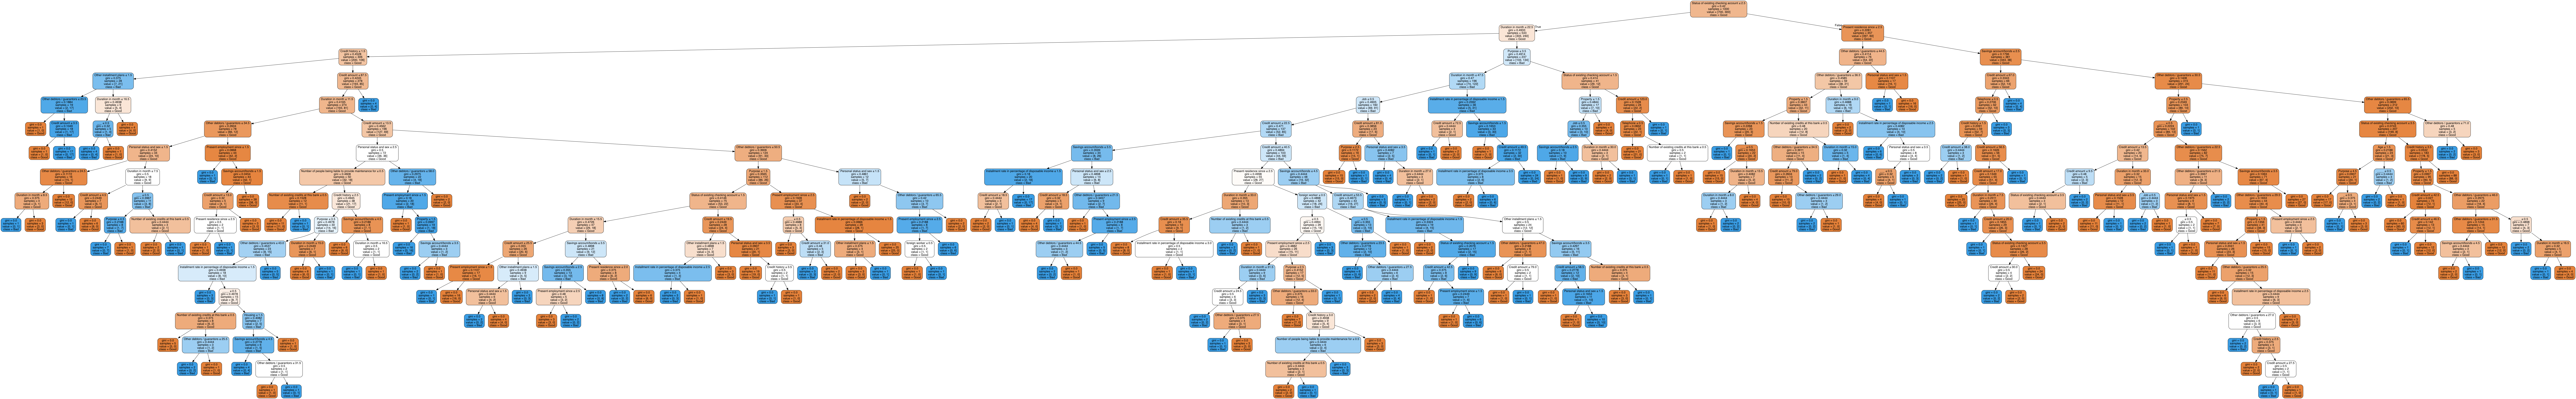

In [34]:
dot_data = tree.export_graphviz(model, out_file="big_tree.out", 
                         feature_names=feature_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graphviz.graph_from_dot_file("big_tree.out")  
Image(graph.create_png())

Качество на кросс-валидации и обучающей выборке

In [65]:
grid = np.arange(2, 30)
err = []
err_cv = []

for i in grid:
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(data.iloc[:, :-1], data[24])
    err_cv.append(cross_val_score(clf, data.iloc[:, :-1], data[24]).mean())
    pred = clf.predict(data.iloc[:, :-1])
    err.append(accuracy_score(data[24], pred).mean())

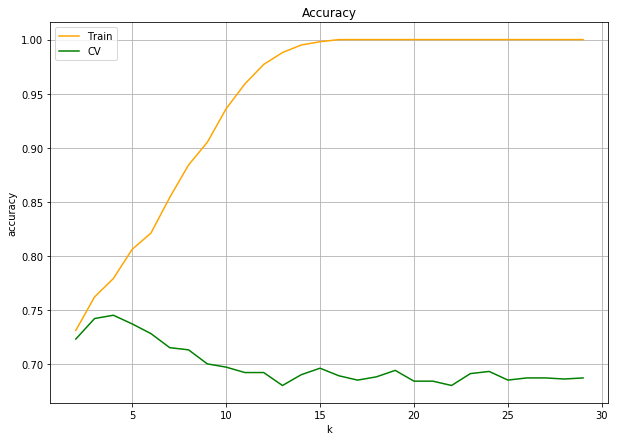

In [66]:
plt.figure(figsize=(10, 7))
plt.title('Accuracy')
plt.plot(grid, err, color='orange', label='Train')
plt.plot(grid, err_cv, color='green', label='CV')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()